## Multiple Linear Regression


In [1]:
# Importing Libraries

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

!pip install mlxtend

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

     ---------------------------------------- 1.4/1.4 MB 6.6 MB/s eta 0:00:00


In [2]:
df = pd.read_csv('energy_data.csv')
df.head(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,60,20,20.700000,44.700000,19.500000,45.590000,21.390000,41.950000,20.566667,45.626667,18.060000,52.900000,11.300000,88.590000,18.100000,43.290000,20.500000,52.790000,18.306667,47.590000,11.016667,756.533333,88.333333,8.833333,38.166667
1,60,0,21.290000,37.863333,19.390000,39.663333,21.790000,36.700000,20.463333,37.526667,19.390000,43.200000,9.690000,30.333333,19.267500,32.095000,22.000000,39.223333,19.600000,38.826667,8.350000,761.800000,70.000000,3.500000,40.000000
2,80,0,21.390000,35.790000,19.290000,37.700000,22.760000,34.290000,21.323333,34.730000,18.426667,43.826667,9.845000,24.750000,19.200000,29.200000,22.390000,37.290000,19.463333,35.500000,6.866667,762.333333,69.666667,3.000000,35.666667
3,40,0,19.033333,41.826667,18.533333,41.290000,18.100000,43.790000,15.890000,47.530000,15.390000,51.030000,5.500000,99.900000,15.561111,40.138889,19.594444,51.062778,15.100000,46.760000,5.133333,769.583333,92.000000,4.833333,23.166667
4,60,30,21.700000,46.633333,20.700000,45.900000,22.323333,44.790000,21.000000,47.966667,19.600000,56.540556,8.800000,99.900000,18.760000,45.200000,20.469444,53.189444,18.290000,51.863333,8.633333,757.566667,95.666667,6.000000,55.333333


In [3]:
df.shape  #1000 rows and 25 cols

(1000, 25)

In [4]:
df.dtypes #datatype  #all are numeric variables

Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
dtype: object

In [7]:
#checking for missing value

df.isnull().sum()


Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
dtype: int64

In [9]:
# information of the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   1000 non-null   int64  
 1   lights       1000 non-null   int64  
 2   T1           1000 non-null   float64
 3   RH_1         1000 non-null   float64
 4   T2           1000 non-null   float64
 5   RH_2         1000 non-null   float64
 6   T3           1000 non-null   float64
 7   RH_3         1000 non-null   float64
 8   T4           1000 non-null   float64
 9   RH_4         1000 non-null   float64
 10  T5           1000 non-null   float64
 11  RH_5         1000 non-null   float64
 12  T6           1000 non-null   float64
 13  RH_6         1000 non-null   float64
 14  T7           1000 non-null   float64
 15  RH_7         1000 non-null   float64
 16  T8           1000 non-null   float64
 17  RH_8         1000 non-null   float64
 18  T9           1000 non-null   float64
 19  RH_9   

### Notes:

1. Appliances - target variable - possibly representing the energy consumption of appliances

2. Lights - energy consumption of lights 

3. T1, RH_1 , T2, RH_2....T9, RH_9 - temperature and humidity readings for different rooms

4. T_out - ouside temperature

5. Press_mm_hg - Atmospheric pressure

6. RH_out - Outside humidity

7. Windspeed - Windspeed

8. Visibility - visibility 

### Outlier Analysis and Treatment

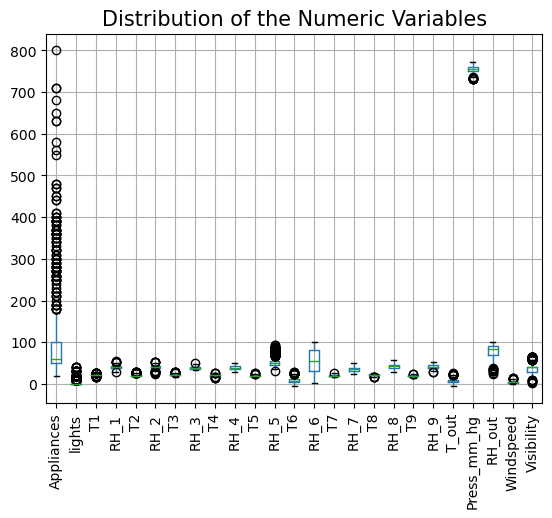

In [14]:
df.boxplot()
plt.title('Distribution of the Numeric Variables', fontsize=15)
plt.xticks(rotation = 'vertical', fontsize = 10)
plt.show()

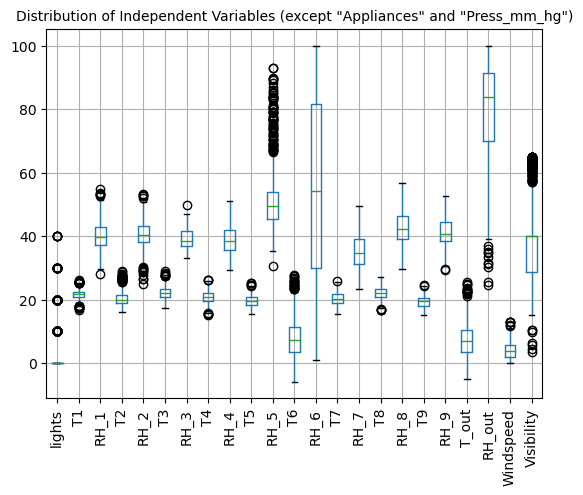

In [17]:
# plot boxplots of all the numeric variables except 'Appliances' and 'Press_mm_hg'. 
df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24]].boxplot()

plt.title('Distribution of Independent Variables (except "Appliances" and "Press_mm_hg")', fontsize = 10)


plt.xticks(rotation = 'vertical', fontsize = 10)

plt.show()

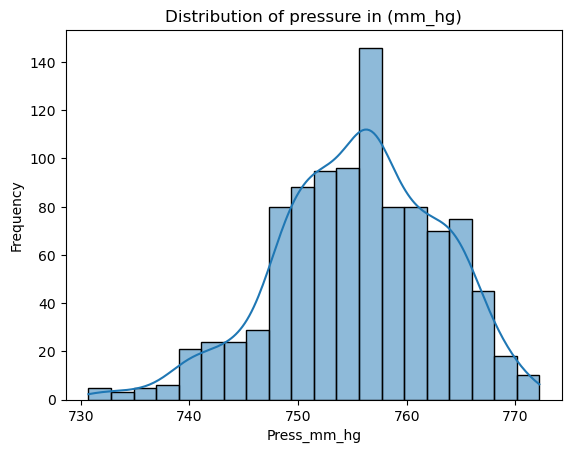

In [20]:
# Distribution of press_mm_hg

sns.histplot(df['Press_mm_hg'], bins=20, kde=True, edgecolor='black')
plt.title('Distribution of pressure in (mm_hg)')
plt.xlabel('Press_mm_hg')
plt.ylabel('Frequency')
plt.show()



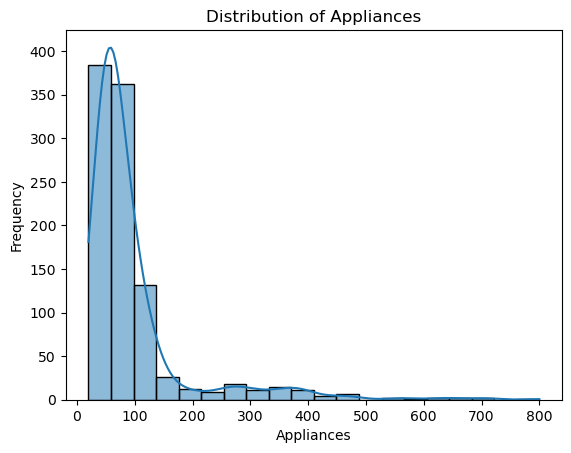

In [28]:
# Distribution of Appliances - target variable

sns.histplot(df['Appliances'], bins=20, kde=True, edgecolor='black')
plt.title('Distribution of Appliances')
plt.xlabel('Appliances')
plt.ylabel('Frequency')
plt.show()



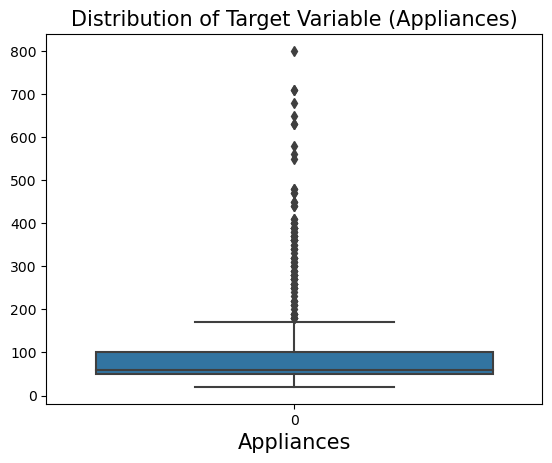

In [29]:
sns.boxplot(df['Appliances'])


plt.title('Distribution of Target Variable (Appliances)', fontsize = 15)
plt.xlabel('Appliances', fontsize = 15)

plt.show()

In [31]:
# Outlier analysis using IQR 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
print('Q1:', Q1)
print('Q3:', Q3)
IQR = Q3-Q1
print('IQR:', IQR)



Q1: Appliances     50.000000
lights          0.000000
T1             20.790000
RH_1           37.200000
T2             18.790000
RH_2           38.057500
T3             20.823333
RH_3           36.900000
T4             19.566667
RH_4           35.484167
T5             18.290000
RH_5           45.412000
T6              3.522500
RH_6           30.090833
T7             18.790000
RH_7           31.352738
T8             20.910625
RH_8           39.200000
T9             18.100000
RH_9           38.421429
T_out           3.537500
Press_mm_hg   750.800000
RH_out         70.000000
Windspeed       2.000000
Visibility     28.666667
Name: 0.25, dtype: float64
Q3: Appliances    100.000000
lights          0.000000
T1             22.533333
RH_1           42.861667
T2             21.390000
RH_2           43.200000
T3             23.390000
RH_3           41.500000
T4             22.100000
RH_4           41.992500
T5             20.666667
RH_5           53.802143
T6             11.300000
RH_6           

In [41]:
#removing the outliers and extracting the rows without outliers

df = df[~((df < (Q1 - 1.5 *IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(543, 25)

### Missing Value analysis and treatment



In [42]:

Total = df.isnull().sum().sort_values(ascending=False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data   #This interprets the missing value and its percentage

,Total,Percentage of Missing Values
Appliances,0,0.000000
RH_6,0,0.000000
Windspeed,0,0.000000
RH_out,0,0.000000
Press_mm_hg,0,0.000000
T_out,0,0.000000
RH_9,0,0.000000
T9,0,0.000000
RH_8,0,0.000000
T8,0,0.000000


In [43]:
# Removing variables with low standard deviation

df.std()

Appliances    25.658997
lights         0.000000
T1             1.418813
RH_1           3.579217
T2             1.821311
RH_2           3.803841
T3             1.784325
RH_3           2.978032
T4             1.810984
RH_4           4.079861
T5             1.666814
RH_5           5.473533
T6             5.325781
RH_6          29.376223
T7             1.898608
RH_7           4.663495
T8             1.832304
RH_8           4.976368
T9             1.813200
RH_9           3.973931
T_out          4.615927
Press_mm_hg    6.922218
RH_out        13.365639
Windspeed      2.279804
Visibility     8.582396
dtype: float64

In [44]:
# Lights is having low std of 0.0000 hence dropping it

df = df.drop('lights', axis=1)

### MLR model with Interaction Effect 

In [45]:
#1. creating a copy of our dataframe

df1 = df.copy()

## Splitting the data into training and test sets

In [46]:
#drop the target varible using drop 

X = df1.drop('Appliances', axis=1)

#dependent variable 

y = df1['Appliances']

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)


print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (434, 24)
y_train (434,)
X_test (109, 24)
y_test (109,)


### Building the MLR model using OLS method

OLS - Ordinary Least Square - used to estimate the parameters of a LR model

- Minimizes the sum of squared differences between the observed and predicted values 

- Main goal is to find the best fit line for the dataset 



In [48]:
MLR_OLS = sm.OLS(y_train, X_train).fit()

print(MLR_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     9.663
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.09e-26
Time:                        20:59:58   Log-Likelihood:                -1942.0
No. Observations:                 434   AIC:                             3932.
Df Residuals:                     410   BIC:                             4030.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          30.5038    157.184      0.194      

In [49]:
# Creating interactions 

df_interaction = df.copy()

In [50]:
# add the interaction variable in the original data
df_interaction['Temp*RH'] = df_interaction['T_out']*df_interaction['RH_out'] 
# a new columns Temp*RH is created which is the calculation of the product of  T_out and RH_out
df_interaction.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Temp*RH
1,60,21.290000,37.863333,19.390000,39.663333,21.790000,36.700000,20.463333,37.526667,19.390000,43.200000,9.690000,30.333333,19.267500,32.095000,22.000000,39.223333,19.600000,38.826667,8.350000,761.800000,70.000000,3.500000,40.000000,584.500000
2,80,21.390000,35.790000,19.290000,37.700000,22.760000,34.290000,21.323333,34.730000,18.426667,43.826667,9.845000,24.750000,19.200000,29.200000,22.390000,37.290000,19.463333,35.500000,6.866667,762.333333,69.666667,3.000000,35.666667,478.377778
3,40,19.033333,41.826667,18.533333,41.290000,18.100000,43.790000,15.890000,47.530000,15.390000,51.030000,5.500000,99.900000,15.561111,40.138889,19.594444,51.062778,15.100000,46.760000,5.133333,769.583333,92.000000,4.833333,23.166667,472.266667
5,50,21.840000,42.745000,19.760000,45.430000,24.066667,39.723333,21.600000,40.218000,20.790000,49.790000,9.000000,53.193333,21.200000,36.500000,22.873333,46.900000,21.000000,45.590000,8.800000,745.500000,89.333333,4.333333,24.333333,786.133333
7,110,22.463333,39.260000,21.290000,39.530000,22.700000,37.700000,21.200000,38.626667,20.926667,44.693333,8.463333,39.800000,20.666667,32.790000,24.033333,38.360000,20.323333,38.000000,9.216667,753.366667,71.333333,3.666667,40.000000,657.455556


#### Splitting the data into training and test set

In [51]:
# dependent variable
y_inter = df_interaction['Appliances']

# set of independent variables
X_inter = df_interaction.drop('Appliances', axis = 1)

# 'sm.add_constant' adds the intercept to the model
X_inter = sm.add_constant(X_inter)


X_train_inter, X_test_inter, y_train_inter, y_test_inter = train_test_split(X_inter, y_inter, random_state=1, test_size = 0.2)


print('X_train_inter', X_train_inter.shape)
print('y_train_inter', y_train_inter.shape)

print('X_test_inter', X_test_inter.shape)
print('y_test_inter', y_test_inter.shape)

X_train_inter (434, 25)
y_train_inter (434,)
X_test_inter (109, 25)
y_test_inter (109,)


### Build the model using OLS

In [52]:
# build a model on training dataset
MLR_model_with_interaction = sm.OLS(y_train_inter, X_train_inter).fit()

print(MLR_model_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     9.899
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           3.46e-28
Time:                        21:04:19   Log-Likelihood:                -1936.6
No. Observations:                 434   AIC:                             3923.
Df Residuals:                     409   BIC:                             4025.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -109.7102    161.459     -0.679      

## Transformations 

In [53]:
# root square transformation on y_train_inter and display top 5 observations

np.sqrt(y_train_inter).head()

559    7.071068
488   10.000000
791    7.071068
862    5.477226
583    7.745967
Name: Appliances, dtype: float64

In [55]:
# Reciprocal transformation

(1/y_train_inter).head()

559   0.020000
488   0.010000
791   0.020000
862   0.033333
583   0.016667
Name: Appliances, dtype: float64

In [57]:
#Log transformation 

np.log(y_train_inter).head()

559   3.912023
488   4.605170
791   3.912023
862   3.401197
583   4.094345
Name: Appliances, dtype: float64

## Model performance after transformation


In [58]:
print(MLR_model_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     9.899
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           3.46e-28
Time:                        21:09:57   Log-Likelihood:                -1936.6
No. Observations:                 434   AIC:                             3923.
Df Residuals:                     409   BIC:                             4025.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -109.7102    161.459     -0.679      

### Checking the assumptions of autocorrelation

Skewness of the residuals:  1.344445844813556


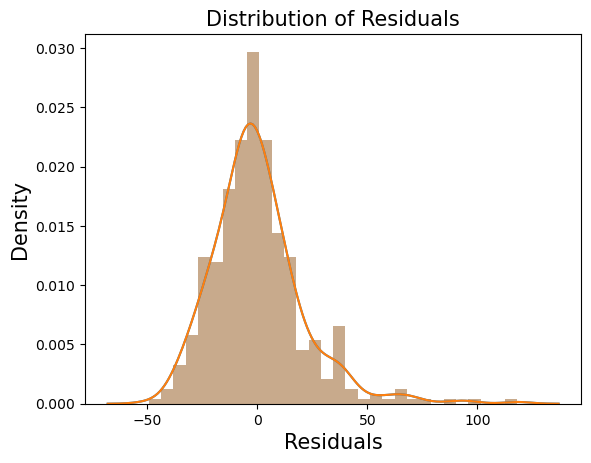

In [60]:
# Check the normality of the residuals 

# plot a distplot for the residuals
sns.distplot(MLR_model_with_interaction.resid)

# add plot and axis labels
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model_with_interaction.resid.skew())
plt.show()

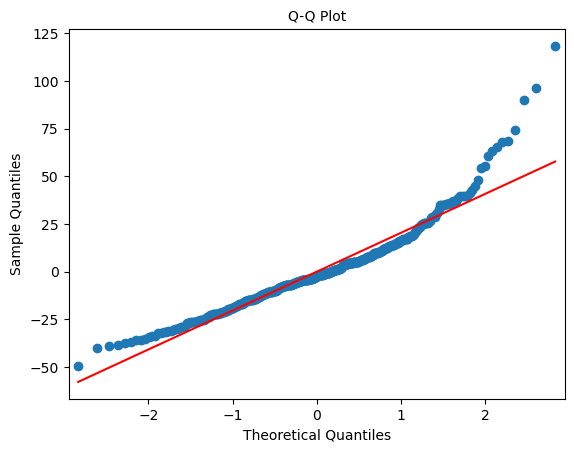

In [62]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_with_interaction.resid, line = 'r')

# set plot and axes labels
plt.title('Q-Q Plot', fontsize = 10)
plt.xlabel('Theoretical Quantiles', fontsize = 10)
plt.ylabel('Sample Quantiles', fontsize = 10)

plt.show()

#### Build the multiple linear regression model using the OLS method after transforming the target variable using square-root transformation.

In [63]:
# build a model on training dataset
MLR_model_after_transform = sm.OLS(np.sqrt(y_train_inter), X_train_inter).fit()

print(MLR_model_after_transform.summary())

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     10.13
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           6.90e-29
Time:                        21:14:43   Log-Likelihood:                -707.66
No. Observations:                 434   AIC:                             1465.
Df Residuals:                     409   BIC:                             1567.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6276      9.513     -0.066      

Skewness of the residuals:  0.7192658722925209


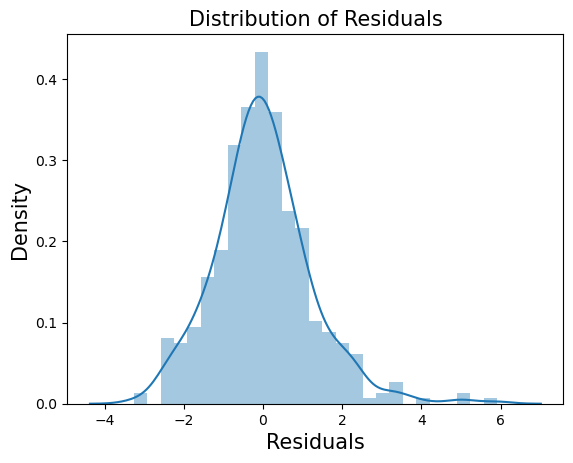

In [66]:
#Normality of the residuals 

sns.distplot(MLR_model_after_transform.resid)

# add plot and axis labels
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

print("Skewness of the residuals: ", MLR_model_after_transform.resid.skew())

plt.show()

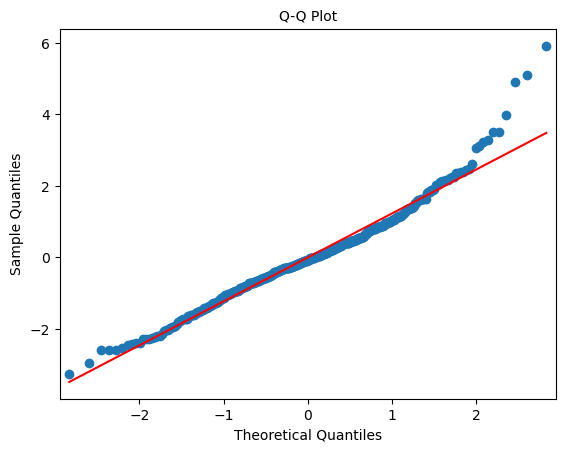

In [68]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_after_transform.resid, line = 'r')

# set plot and axes labels
plt.title('Q-Q Plot', fontsize = 10)
plt.xlabel('Theoretical Quantiles', fontsize = 10)
plt.ylabel('Sample Quantiles', fontsize = 10)

plt.show()

## Stepwise regression



In [70]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build forward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. Here '12' is the stopping rule
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator=linreg, k_features = 12, forward=True,
                     verbose=2, scoring='r2')

# fit the forward selection on training data using fit()
# we use the independent variables including intersection variable 'T_out*RH_out'
sfs_forward = linreg_forward.fit(X_train_inter, y_train_inter)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished

[2023-11-27 21:16:21] Features: 1/12 -- score: 0.13316975273707782[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished

[2023-11-27 21:16:21] Features: 2/12 -- score: 0.15686411972888012[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.2s finished

[2023-11-27 21:16:22] Features: 3/12 -- score: 0.19323131256265583[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [71]:
# print the selected feature names when k_features = 12
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('const', 'RH_1', 'RH_2', 'T4', 'T6', 'RH_6', 'T7', 'T8', 'RH_8', 'T9', 'RH_9', 'Windspeed')

R-Squared:  0.2952923291515064


#### We can pass a range of variables in the k_features i.e. k_features = (5, 15) in the following example

In [72]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. (5,15) means that all the possible subsets sequentially will be created 
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = (5,15), forward = True,
                     verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
# we use the independent variables including intersection variable 'T_out*RH_out'
sfs_forward = linreg_forward.fit(X_train_inter, y_train_inter)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s finished

[2023-11-27 22:14:38] Features: 1/15 -- score: 0.13316975273707782[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s finished

[2023-11-27 22:14:38] Features: 2/15 -- score: 0.15686411972888012[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s finished

[2023-11-27 22:14:39] Features: 3/15 -- score: 0.19323131256265583[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [73]:
# print the selected feature names when k_features = (5, 15)
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('const', 'RH_1', 'RH_2', 'T4', 'T6', 'RH_6', 'T7', 'T8', 'RH_8', 'T9', 'RH_9', 'Windspeed', 'Temp*RH')

R-Squared:  0.2969298891434222


#### We can also pass a string 'best' in the k_features that will select the best feature set i.e. k_features = 'best' in the following example.

In [74]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True,
                     verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
# we use the independent variables including intersection variable 'T_out*RH_out'
sfs_forward = linreg_forward.fit(X_train_inter, y_train_inter)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s finished

[2023-11-27 22:18:03] Features: 1/25 -- score: 0.13316975273707782[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s finished

[2023-11-27 22:18:04] Features: 2/25 -- score: 0.15686411972888012[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished

[2023-11-27 22:18:04] Features: 3/25 -- score: 0.19323131256265583[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [75]:
# printing the selected feature names when k_features = 'best'
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('const', 'RH_1', 'RH_2', 'T4', 'T6', 'RH_6', 'T7', 'T8', 'RH_8', 'T9', 'RH_9', 'Windspeed', 'Temp*RH')

R-Squared:  0.2969298891434222


In [76]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build backward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = 12, forward = False,
                     verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
# we use the independent variables including intersection variable 'T_out*RH_out'
sfs_backward = linreg_backward.fit(X_train_inter, y_train_inter)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished

[2023-11-27 22:18:29] Features: 24/12 -- score: 0.27795551629620624[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.7s finished

[2023-11-27 22:18:30] Features: 23/12 -- score: 0.28325149609711564[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished

[2023-11-27 22:18:31] Features: 22/12 -- score: 0.28737859771689483[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

In [77]:
# print the selected feature names when k_features = 12
print('Features selelected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
('RH_1', 'T3', 'T6', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Temp*RH')

R-Squared:  0.2995503309675275


#### We can pass a range of variables in the k_features i.e. k_features = (5, 15) in the following example.

In [78]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step backward feature selection
# pass the regression model to 'estimator'
# pass number of required features to 'k_features'. (5,15) means that all the possible subset combinations will be created 
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = (5, 15), forward = False,
                     verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
# we use the independent variables including intersection variable 'T_out*RH_out'
sfs_backward = linreg_backward.fit(X_train_inter, y_train_inter)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s finished

[2023-11-27 22:19:01] Features: 24/5 -- score: 0.27795551629620624[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.7s finished

[2023-11-27 22:19:02] Features: 23/5 -- score: 0.28325149609711564[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished

[2023-11-27 22:19:03] Features: 22/5 -- score: 0.28737859771689483[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [79]:
# print the selected feature names when k_features = (5, 15)
print('Features selelected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
('RH_1', 'T3', 'T6', 'T7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Temp*RH')

R-Squared:  0.30017087331618064


#### We can also pass a string 'best' in the k_features that will select the best feature set i.e. k_features = 'best' in the following example.

In [80]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step backward feature selection
# pass the regression model to 'estimator'
# pass number of required features to 'k_features'. 'best' means that a best possible subset will be selected 
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False,
                     verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
# we use the independent variables including intersection variable 'T_out*RH_out'
sfs_backward = linreg_backward.fit(X_train_inter, y_train_inter)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s finished

[2023-11-27 22:20:40] Features: 24/1 -- score: 0.27795551629620624[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s finished

[2023-11-27 22:20:41] Features: 23/1 -- score: 0.28325149609711564[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished

[2023-11-27 22:20:41] Features: 22/1 -- score: 0.28737859771689483[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [81]:
# print the selected feature names when k_features = 'best'
print('Features selelected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
('RH_1', 'T3', 'T6', 'T7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Temp*RH')

R-Squared:  0.30017087331618064


<a id="kfold"></a>
## K-Fold Cross Validation
K-Fold cross validation is where a given dataset is divided into `K` folds where at some stage each fold is used as a test set.

In [ ]:
# K- Fold Cross validation using cross_val_score()



In [82]:
# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing linear regression
# pass the X_train_inter and y_train_inter sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'r2' for r-squared, 'neg_mean_squared_error' for mean squared error (negative)
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train_inter, 
                         y = y_train_inter, 
                         cv = 15, 
                         scoring = 'r2')

In [83]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.30819093 0.35817174 0.12661304 0.05318118 0.18597434 0.35972284
 0.38286912 0.28342866 0.36134786 0.35805242 0.07367636 0.41875337
 0.41027422 0.13977152 0.31483931]

Minimum score obtained:  0.0532
Maximum score obtained:  0.4188
Average score obtained:  0.2757
